In [24]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [26]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [27]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [28]:
print(f"Number of training examples: {train_set_x_orig.shape[0]}")
print ("shape of training examples: " + str(train_set_x_orig.shape))
print ("shape of training labels: " + str(train_set_y.shape))
print ("shape of test examples: " + str(test_set_x_orig.shape))
print(f"Number of test examples: {test_set_x_orig.shape[0]}")

Number of training examples: 209
shape of training examples: (209, 64, 64, 3)
shape of training labels: (1, 209)
shape of test examples: (50, 64, 64, 3)
Number of test examples: 50


In [29]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [30]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

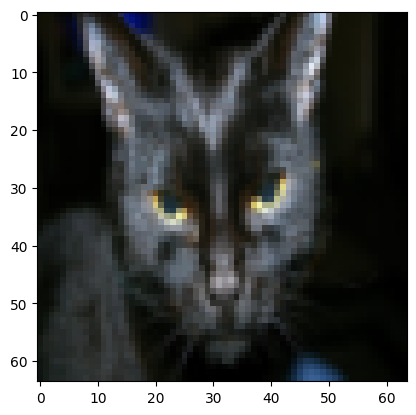

In [31]:
plt.imshow(train_set_x_orig[25])

In [32]:
# Flattened each image and transpose it so that each column represents a flattened image

train_set_x_flatten =train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten =test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


In [33]:
train_set_x_flatten[:,0]

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [34]:
train_set_x_flatten.shape

(12288, 209)

In [35]:
print ("shape of training examples: " + str(train_set_x_flatten.shape))
print ("shape of training labels: " + str(train_set_y.shape))

shape of training examples: (12288, 209)
shape of training labels: (1, 209)


In [36]:
# normalize each image using a scale factor of 255

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

print ("shape of training examples: " + str(train_set_x.shape))

shape of training examples: (12288, 209)


In [37]:
from LogisticRegression import LogisticRegression


model = LogisticRegression(max_iter=2500,lr=0.006)

In [38]:
costs = model.fit(train_set_x, train_set_y)

In [46]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [39]:
y_prediction = model.predict(test_set_x)

In [40]:
model.score(test_set_x, test_set_y)

0.6799999999999999

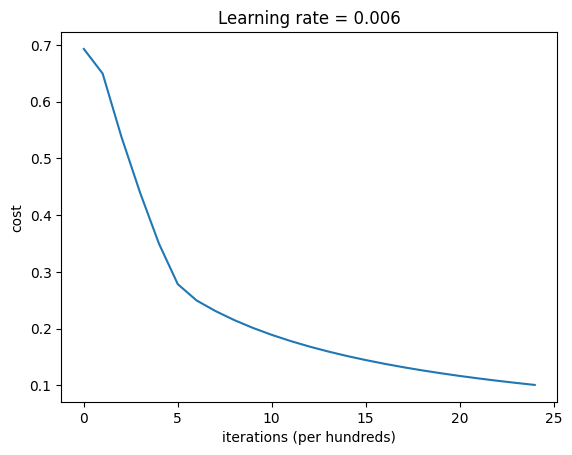

In [41]:
costs_per_100_iter = np.squeeze(model.costs)

plt.plot(costs_per_100_iter)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate = {model.lr}")
plt.show()

In [42]:
train_set_x[900]

array([0.02745098, 0.32156863, 0.54509804, 0.01176471, 0.03137255,
       0.34117647, 0.21176471, 0.45882353, 0.51372549, 0.10980392,
       0.88627451, 0.4627451 , 0.12156863, 0.10980392, 0.3254902 ,
       0.99607843, 1.        , 0.98823529, 0.59607843, 0.08627451,
       0.44705882, 0.12156863, 0.73333333, 0.96470588, 0.64705882,
       0.24313725, 0.18431373, 0.09411765, 0.05882353, 0.22352941,
       0.15686275, 0.5372549 , 0.59607843, 0.63529412, 0.11372549,
       0.4627451 , 0.1372549 , 0.92156863, 0.07843137, 0.28235294,
       0.52941176, 0.00392157, 1.        , 0.2       , 0.45882353,
       0.51372549, 0.64313725, 0.18431373, 0.07058824, 0.00392157,
       0.71764706, 0.75294118, 0.85098039, 0.71764706, 0.17254902,
       1.        , 0.30588235, 0.92156863, 0.09411765, 0.34901961,
       0.14117647, 0.30196078, 0.61568627, 0.16078431, 0.4745098 ,
       0.3372549 , 0.5254902 , 0.34509804, 0.47843137, 0.88235294,
       1.        , 0.07843137, 0.08235294, 0.83921569, 0.10980

In [43]:
np.zeros((train_set_x.shape[0], 1)).shape

(12288, 1)

In [44]:
A = np.random.randn(4,3)

B = np.sum(A, axis = 1) 

In [45]:
B.shape

(4,)